In [2]:
from utils import get_pbp_data, get_players_info, get_player_id_from_play_metadata

In [3]:
# Years Hubbard played

pbp = get_pbp_data(list(range(2018, 2025)))
print(list(pbp.columns))

['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch', 'run_location', 'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result', 'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 'td_player_name', 'td_player_id', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'score_differential', 'posteam_score_post', 'defteam_score_post', 'score_differential

In [7]:
# Only keep play description with sam hubbard in the description
pbp = pbp[pbp['desc'].str.contains('94-S.Hubbard', na=False)][['desc', 'home_team', 'away_team', 'game_id']]
hubbard_yard_dash = pbp[pbp['desc'].str.contains('TOUCHDOWN')]
for desc in hubbard_yard_dash['desc']:
    if 'Huntley' in desc:
        print(desc)

(11:54) 2-T.Huntley up the middle to CIN 1 for no gain (55-L.Wilson; 57-G.Pratt). FUMBLES (55-L.Wilson), RECOVERED by CIN-94-S.Hubbard at CIN 2. 94-S.Hubbard for 98 yards, TOUCHDOWN.


/var/folders/4b/7v01nk757qsbhc05_11mrdnr0000gn/T/ipykernel_72110/2504925601.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  plays = pbp['desc'].str.lower().str.replace('.', ' ').replace(r'\)', '', regex=True).replace(r'\(', '', regex=True).to_list()


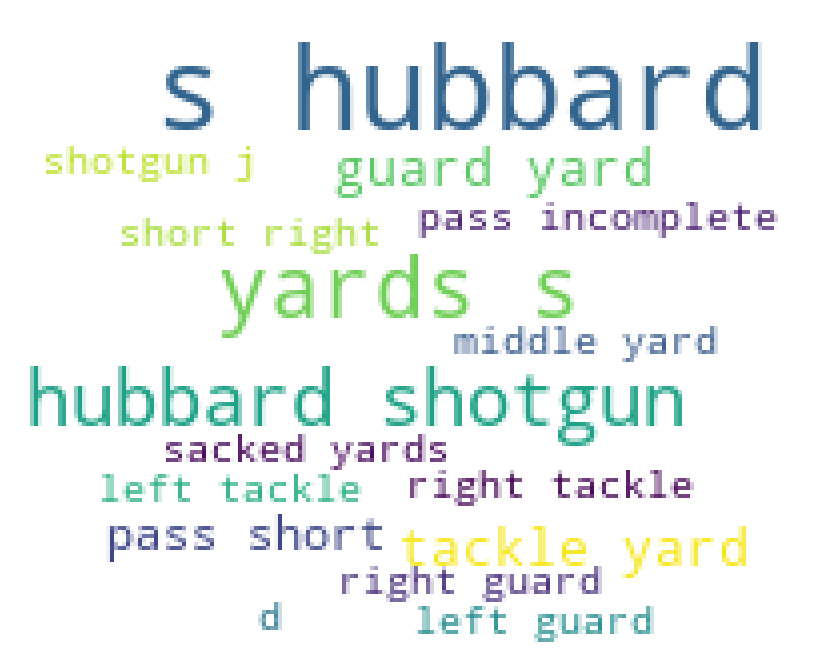

In [8]:
# Word cloud of play description
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from numpy import hstack, nan
import re
REGEX = "\\w\\.(\\w*)"
stopwords = set(STOPWORDS)
comment_words = ''
players_df = pbp
plays = pbp['desc'].str.lower().str.replace('.', ' ').replace(r'\)', '', regex=True).replace(r'\(', '', regex=True).to_list()
for play in plays:
    tokens = play.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        # if 'shotgun' in tokens[i]:
            # print(play)
        if len(tokens[i]) < 4:
            tokens[i] = ''
    comment_words += " ".join(tokens)+" "
# print(comment_words)
wordcloud = WordCloud(width = 200, height = 160,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [17]:
# Figure out who Hubbard "played" with the most
import re
from collections import defaultdict
player_id_columns = [
    "td_player_id",
    "passer_player_id",
    "receiver_player_id",
    "rusher_player_id",
    "lateral_receiver_player_id",
    "lateral_rusher_player_id",
    "lateral_sack_player_id",
    "interception_player_id",
    "lateral_interception_player_id",
    "punt_returner_player_id",
    "lateral_punt_returner_player_id",
    "kickoff_returner_player_id",
    "punter_player_id",
    "lateral_kickoff_returner_player_id",
    "kicker_player_id",
    "own_kickoff_recovery_player_id",
    "blocked_player_id",
    "tackle_for_loss_1_player_id",
    "tackle_for_loss_2_player_id",
    "qb_hit_1_player_id",
    "qb_hit_2_player_id",
    "forced_fumble_player_1_player_id",
    "forced_fumble_player_2_player_id",
    "solo_tackle_1_player_id",
    "solo_tackle_2_player_id",
    "assist_tackle_1_player_id",
    "assist_tackle_2_player_id",
    "assist_tackle_3_player_id",
    "assist_tackle_4_player_id",
    "tackle_with_assist_1_player_id",
    "tackle_with_assist_2_player_id",
    "pass_defense_1_player_id",
    "pass_defense_2_player_id",
    "fumbled_1_player_id",
    "fumbled_2_player_id",
    "fumble_recovery_1_player_id",
    "fumble_recovery_2_player_id",
    "sack_player_id",
    "half_sack_1_player_id",
    "half_sack_2_player_id",
    "penalty_player_id",
    "safety_player_id",
]
players = defaultdict(int)
sam_hubbard_id = '00-0034834'
pbp = get_pbp_data(list(range(2018, 2025)))
# Only keep play description with sam hubbard in the description
pbp = pbp[pbp['desc'].str.contains('94-S.Hubbard', na=False)][player_id_columns + ['desc']]

for index, row in pbp.iterrows():
    unique_players_in_play = set([id for id in row[player_id_columns].to_list() if id is not None])
    for player in unique_players_in_play:
        if player != sam_hubbard_id:
            players[player] += 1
    # players.update((row['home_team'], row['away_team'], matches))

print(players)



defaultdict(<class 'int'>, {'00-0033897': 4, '00-0026158': 5, '00-0031577': 1, '00-0027720': 10, '00-0032426': 1, '00-0030663': 1, '00-0032890': 1, '00-0032134': 1, '00-0027973': 8, '00-0029854': 1, '00-0027939': 1, '00-0032058': 1, '00-0030456': 1, '00-0033118': 5, '00-0029701': 11, '00-0027662': 6, '00-0028912': 3, '00-0033553': 9, '00-0033857': 1, '00-0022924': 16, '00-0030470': 1, '00-0034683': 2, '00-0030414': 1, '00-0031503': 5, '00-0032741': 2, '00-0031408': 1, '00-0032009': 1, '00-0031171': 5, '00-0033790': 2, '00-0027044': 1, '00-0032450': 2, '00-0034835': 1, '00-0033066': 3, '00-0034796': 24, '00-0034184': 8, '00-0031598': 1, '00-0034791': 21, '00-0029560': 1, '00-0027685': 1, '00-0028986': 2, '00-0034109': 1, '00-0032549': 1, '00-0033912': 1, '00-0027993': 1, '00-0031280': 10, '00-0034747': 1, '00-0029479': 1, '00-0033956': 1, '00-0024306': 1, '00-0032436': 2, '00-0032257': 1, '00-0034331': 6, '00-0032892': 8, '00-0033594': 6, '00-0030471': 5, '00-0029263': 7, '00-0034159': 